Assignment 3 --


In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import random as rand
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
class Evaluate_Model:
  def __init__(self, model, lr, number_of_epochs, optim):
    
    self.model = model
    self.lr = lr 
    self.optim = optim
    self.number_of_epochs = number_of_epochs
    self.epoch_loss = []
    self.iteration_no = []

    print('inside Evaluate_Model')

    if optim == 'adam':
        self.optimizer = torch.optim.Adam(model.parameters(), lr)
    if optim == 'sgd':
        self.optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9)
    if optim == 'adadelta':
        self.optimizer = torch.optim.Adadelta(model.parameters(), lr, eps=1e-6, weight_decay=0)
    if optim == 'adagrad':
        self.optimizer = torch.optim.Adagrad(model.parameters(), lr, lr_decay=1e-6, weight_decay=0)
    if optim == 'rmsprop':
        self.optimizer = torch.optim.RMSprop(model.parameters(), lr, alpha=0.995, eps=1e-7, weight_decay=0)
        
    print('Optimizer Chosen',optim)

    
# L2 Regularization
  def L2_regularization(self, loss):
          l2 = 0
          lam = 0.7 
          for W in model.parameters():
              l2 += W.norm(2)
          loss = loss + 0.5*lam*l2
          return loss
        
# Train the model
  def train_model(self, train_loader):

    #optimizer = torch.optim.Adam(model.parameters(), lr)
        
    iter = 0
    
    print(self.number_of_epochs)
    
    for epoch in range(number_of_epochs):
        for i, (img, labels) in enumerate(train_loader):
          
            img = Variable(img.view(-1, 3*32*32))
            labels = Variable(labels)

            # the gradients are cleared with respect to the parameters
            self.optimizer.zero_grad()

            # get the output from the model
            outputs = model(img)

            # Calculate the loss
            loss = criterion(outputs, labels)

            loss = self.L2_regularization(loss)

            # the gradients are retrieved
            loss.backward()
            
            # Updating parameters
            self.optimizer.step()
            
    return loss            
            

# Test the Model
  def test_model(self, test_loader, loss):
      
      iter = 0
      
      for epoch in range(self.number_of_epochs):
                  
          if iter % 200 == 0:

              # Calculate Accuracy         
              correct = 0
              total = 0

              # Iterate through test dataset
              for img, labels in test_loader:
                
                  iter += 1

                  img = Variable(img.view(-1, 3*32*32))

                  #To get logits/output
                  outputs = model(img)

                  # Get predictions from the maximum value
                  _, predicted = torch.max(outputs.data, 1)

                  total += labels.size(0)

                  correct += (predicted.cpu() == labels.cpu()).sum()

              # Calculating the accuracy          
              accuracy = 100 * correct / total

              # Print Loss
              print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))
              self.epoch_loss.append(loss.data[0])
              self.iteration_no.append(iter)
          
      # plotting the points  
      plt.plot(self.iteration_no, self.epoch_loss) 

      # naming the x axis 
      plt.xlabel('number of iterations') 
      # naming the y axis 
      plt.ylabel('epoch loss') 

      # giving a title to my graph 
      plt.title('learning curve') 

      # function to show the plot 
      plt.show()             
          
      # Create Confusion Matrix
      print(confusion_matrix(predicted, labels))


In [0]:
# CREATE THE MODEL CLASS
class MLP_Network(nn.Module):
    def __init__(self, input_dimension, hidden_neurons, output_dimension, activ_func):
        super(MLP_Network, self).__init__()
        
        self.input_dimension = input_dimension
        self.hidden_neurons = hidden_neurons
        self.output_dimension = output_dimension
                     
        self.linear1 = nn.Linear(input_dimension, hidden_neurons)
        self.linear1_drop = nn.Dropout(0.3)
        self.linear2 = nn.Linear(hidden_neurons, output_dimension)
        
        if activ_func=="ReLU":
            self.activ = nn.ReLU()
        if activ_func=="Tanh":
            self.activ = nn.Tanh()
        if activ_func=="Sigmoid":
            self.activ = nn.Sigmoid()  
            
        print(activ_func, '-', self.activ)
        
     
    def forward(self, x):
        out = self.activ(self.linear1(x))
        out = self.linear1_drop(out)
        out = self.linear2(out)
        return out


In [0]:
# LOAD THE TEST AND TRAIN SET

train_dataset = dsets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = dsets.CIFAR10('./data', train=False, download=True, transform=transforms.ToTensor())


Files already downloaded and verified


In [0]:
# LOOPING OVER THE DATASET

batch_size = 50
n_iters = 2000
number_of_epochs =int(n_iters / (len(train_dataset) / batch_size))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
 
# Calculating Cross Entropy  
criterion = nn.CrossEntropyLoss()

ReLU  -  sgd
ReLU - ReLU()
inside Evaluate_Model
Optimizer Chosen sgd
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:106: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 200. Loss: 2.338409662246704. Accuracy: 10
Iteration: 400. Loss: 2.338409662246704. Accuracy: 10


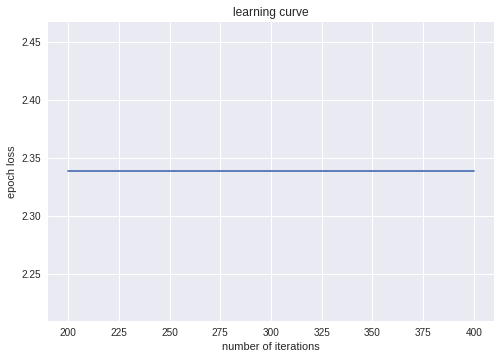

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [9 2 7 8 3 6 2 6 5 2]]
ReLU  -  adam
ReLU - ReLU()
inside Evaluate_Model
Optimizer Chosen adam
2
Iteration: 200. Loss: 168.10467529296875. Accuracy: 9
Iteration: 400. Loss: 168.10467529296875. Accuracy: 10


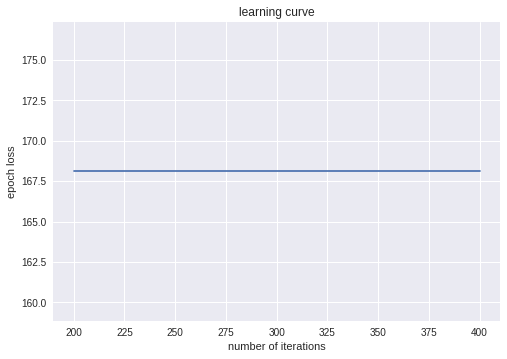

[[9 2 7 7 3 5 2 6 5 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
ReLU  -  adagrad
ReLU - ReLU()
inside Evaluate_Model
Optimizer Chosen adagrad
2
Iteration: 200. Loss: 3.773894786834717. Accuracy: 9
Iteration: 400. Loss: 3.773894786834717. Accuracy: 8


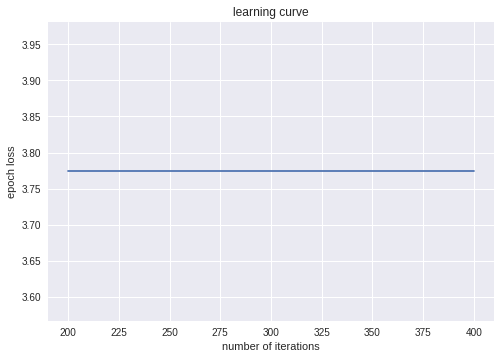

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [2 0 1 1 2 0 0 3 3 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [7 2 5 7 1 6 1 2 2 1]
 [0 0 0 0 0 0 0 0 0 0]]
ReLU  -  adadelta
ReLU - ReLU()
inside Evaluate_Model
Optimizer Chosen adadelta
2
Iteration: 200. Loss: 2.316816568374634. Accuracy: 8
Iteration: 400. Loss: 2.316816568374634. Accuracy: 8


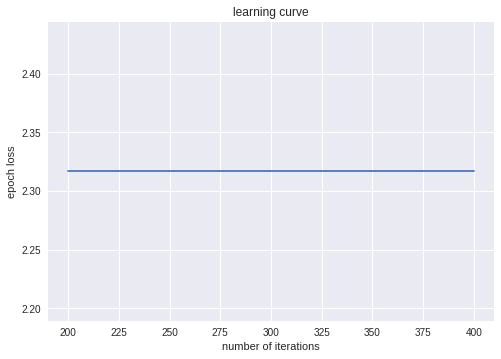

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 2 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [9 1 7 7 3 4 2 5 5 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
ReLU  -  rmsprop
ReLU - ReLU()
inside Evaluate_Model
Optimizer Chosen rmsprop
2
Iteration: 200. Loss: 188.8994140625. Accuracy: 10
Iteration: 400. Loss: 188.8994140625. Accuracy: 10


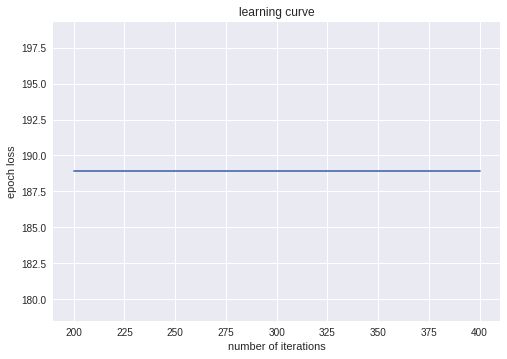

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [9 2 7 8 3 6 2 6 5 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Tanh  -  sgd
Tanh - Tanh()
inside Evaluate_Model
Optimizer Chosen sgd
2
Iteration: 200. Loss: 44.46044158935547. Accuracy: 9
Iteration: 400. Loss: 44.46044158935547. Accuracy: 10


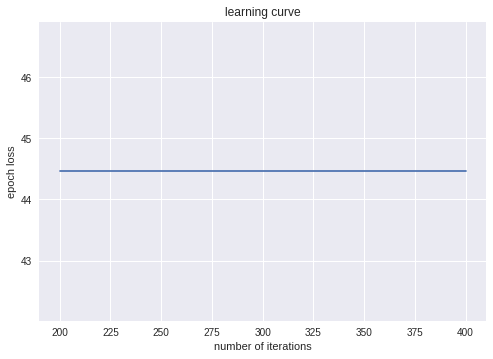

[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [9 2 7 7 3 5 2 6 5 2]]
Tanh  -  adam
Tanh - Tanh()
inside Evaluate_Model
Optimizer Chosen adam
2
Iteration: 200. Loss: 128.39602661132812. Accuracy: 10
Iteration: 400. Loss: 128.39602661132812. Accuracy: 10


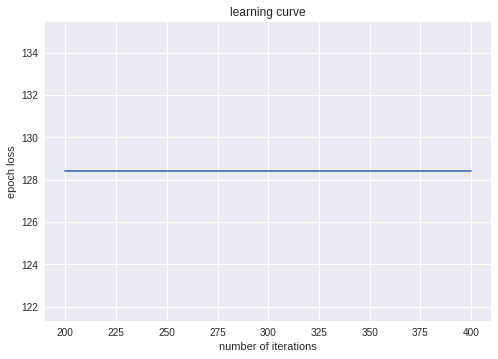

[[0 0 0 0 0 0 0 0 0 0]
 [8 2 7 8 2 6 2 6 4 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Tanh  -  adagrad
Tanh - Tanh()
inside Evaluate_Model
Optimizer Chosen adagrad
2
Iteration: 200. Loss: 2.5130321979522705. Accuracy: 10
Iteration: 400. Loss: 2.5130321979522705. Accuracy: 9


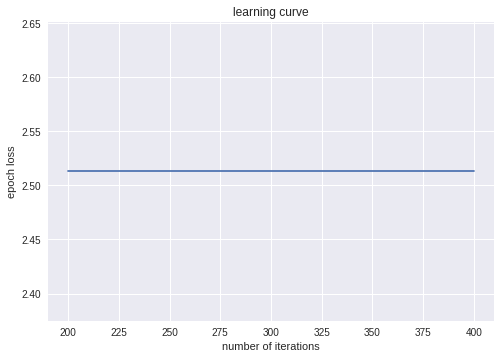

[[0 1 0 0 0 0 0 1 0 0]
 [5 0 3 6 1 1 1 3 3 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [4 1 4 2 2 5 1 2 2 1]]
Tanh  -  adadelta
Tanh - Tanh()
inside Evaluate_Model
Optimizer Chosen adadelta
2
Iteration: 200. Loss: 2.3183882236480713. Accuracy: 9
Iteration: 400. Loss: 2.3183882236480713. Accuracy: 9


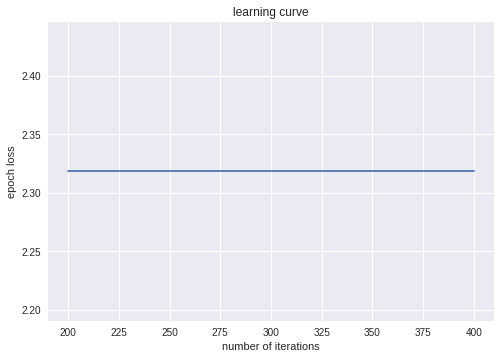

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [6 2 5 8 3 5 2 6 5 2]
 [2 0 2 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Tanh  -  rmsprop
Tanh - Tanh()
inside Evaluate_Model
Optimizer Chosen rmsprop
2
Iteration: 200. Loss: 194.5482940673828. Accuracy: 10
Iteration: 400. Loss: 194.5482940673828. Accuracy: 10


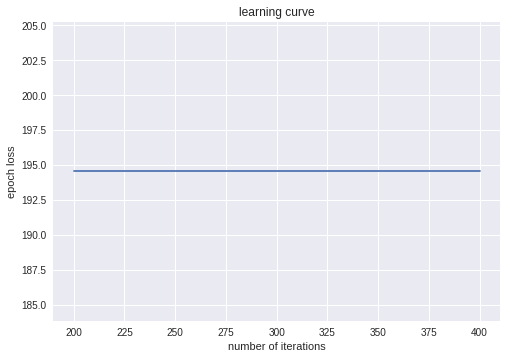

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [9 2 7 8 3 6 2 6 5 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Sigmoid  -  sgd
Sigmoid - Sigmoid()
inside Evaluate_Model
Optimizer Chosen sgd
2
Iteration: 200. Loss: 3.348475217819214. Accuracy: 9
Iteration: 400. Loss: 3.348475217819214. Accuracy: 9


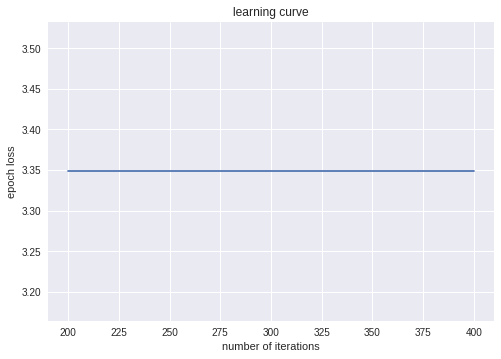

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [7 2 7 8 3 6 2 6 4 2]]
Sigmoid  -  adam
Sigmoid - Sigmoid()
inside Evaluate_Model
Optimizer Chosen adam
2
Iteration: 200. Loss: 80.4398193359375. Accuracy: 9
Iteration: 400. Loss: 80.4398193359375. Accuracy: 9


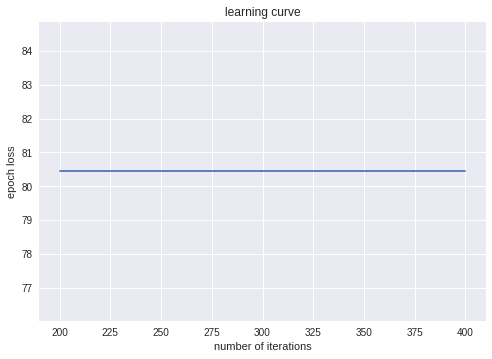

[[0 0 0 0 0 0 0 0 0 0]
 [4 1 6 7 3 6 1 5 4 2]
 [5 1 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Sigmoid  -  adagrad
Sigmoid - Sigmoid()
inside Evaluate_Model
Optimizer Chosen adagrad
2
Iteration: 200. Loss: 2.8971922397613525. Accuracy: 10
Iteration: 400. Loss: 2.8971922397613525. Accuracy: 10


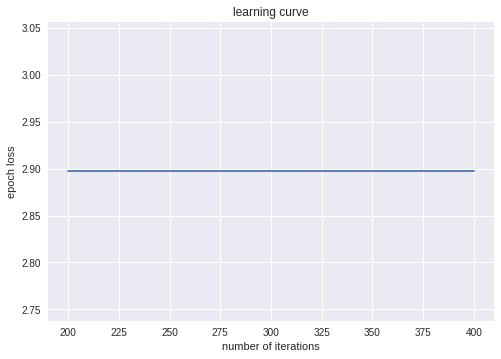

[[0 0 0 0 0 0 0 0 0 0]
 [9 2 7 8 3 6 2 6 5 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Sigmoid  -  adadelta
Sigmoid - Sigmoid()
inside Evaluate_Model
Optimizer Chosen adadelta
2
Iteration: 200. Loss: 2.3425867557525635. Accuracy: 10
Iteration: 400. Loss: 2.3425867557525635. Accuracy: 10


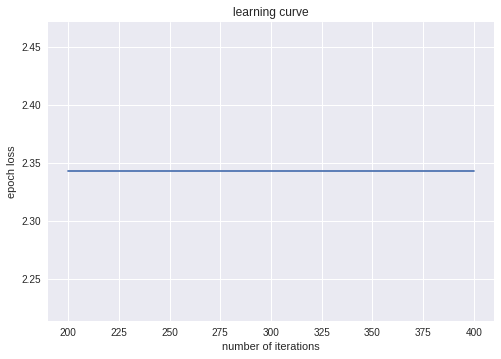

[[9 2 7 8 3 6 2 6 5 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Sigmoid  -  rmsprop
Sigmoid - Sigmoid()
inside Evaluate_Model
Optimizer Chosen rmsprop
2
Iteration: 200. Loss: 76.77429962158203. Accuracy: 9
Iteration: 400. Loss: 76.77429962158203. Accuracy: 9


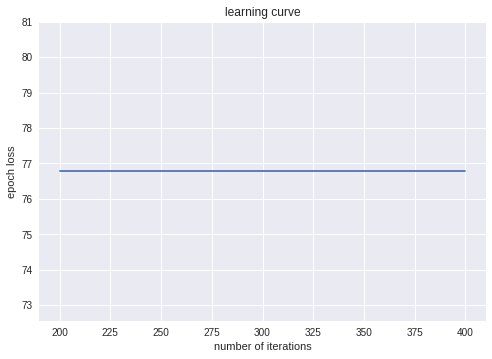

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [6 2 3 5 2 2 2 4 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [3 0 4 3 1 4 0 2 4 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


"\nmodel = MLP_Network(input_dimension, hidden_neurons, output_dimension, activ_func='ReLU')\nevaluate = Evaluate_Model(model, lr, number_of_epochs, optim='sgd')\nloss = evaluate.train_model(train_loader)\nevaluate.test_model(test_loader, loss)\n\n"

In [0]:
# CALLING THE CLASS MODEL WITH VALUES FOR THE INPUT AND OUTPUT DIMENSIONS

input_dimension = 3*32*32
hidden_neurons = 512
output_dimension = 10
lr = 0.1 

opti = ['sgd', 'adam', 'adagrad', 'adadelta', 'rmsprop']
activ = ['ReLU','Tanh','Sigmoid']


for activ_func in activ:
    for optim in opti:
        print(activ_func,' - ', optim)
        model = MLP_Network(input_dimension, hidden_neurons, output_dimension, activ_func)
        evaluate = Evaluate_Model(model, lr, number_of_epochs, optim)
        loss = evaluate.train_model(train_loader)
        evaluate.test_model(test_loader, loss)    
        
'''
model = MLP_Network(input_dimension, hidden_neurons, output_dimension, activ_func='ReLU')
evaluate = Evaluate_Model(model, lr, number_of_epochs, optim='sgd')
loss = evaluate.train_model(train_loader)
evaluate.test_model(test_loader, loss)

'''